In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [6]:
#python kodu buraya
titanic.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [7]:
#python kodu buraya
mean_enc = titanic.groupby(['Sex'])['Survived'].mean().to_dict() 
  
titanic["Sex"] =  titanic["Sex"].map(mean_enc) 
  
titanic[["Sex","Survived"]]

,Sex,Survived
0,0.188908,0
1,0.742038,1
2,0.742038,1
3,0.742038,1
4,0.188908,0
...,...,...
886,0.188908,0
887,0.742038,1
888,0.742038,0
889,0.188908,1


In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0.188908,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.742038,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.742038,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0.188908,26.0,0,0,111369,30.0000,C148,C


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [9]:
from sklearn.preprocessing import OneHotEncoder
onehot_titanic = OneHotEncoder(sparse = False)

titanic_copy = titanic.copy()

titanic_copy.Embarked.fillna(titanic_copy["Embarked"].mode()[0], inplace=True) #embarked değişkenindeki nan valueları mode ile doldurdum

In [10]:
titanic_copy.Embarked.isnull().sum() 

0

In [11]:
encoded = onehot_titanic.fit_transform(titanic_copy[["Embarked"]]).astype(np.uint8)
encoded

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [13]:

dataframe = pd.DataFrame(encoded, index = titanic_copy.index, columns = ["C","Q","S"])
dataframe

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [14]:
from sklearn.preprocessing import LabelEncoder

label_df = titanic.copy()

In [15]:
labelEncoder = LabelEncoder()

label_df["Cabin"] =label_df["Cabin"].astype(str)
label_df["Cabin"] = labelEncoder.fit_transform(label_df["Cabin"])

label_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,81,C
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,55,S
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,147,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0.188908,27.0,0,0,211536,13.0000,147,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.742038,19.0,0,0,112053,30.0000,30,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.742038,NaN,1,2,W./C. 6607,23.4500,147,S
889,890,1,1,"Behr, Mr. Karl Howell",0.188908,26.0,0,0,111369,30.0000,60,C


In [16]:
label_df.Cabin.unique()

array([147,  81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,
        21,  80, 142, 140, 122,  12,  91,  98,  52,  36, 116, 138, 107,
        45, 141,  61, 123,  18,  14,  69, 144,   9,  28,  43,   8, 103,
        93,  87,  78, 102,  83,  40, 134,  46,  57,  89,  54, 113,   3,
        31,  90,  62,  51,  74, 125,  72,  35,  76, 124,  65,  17,  56,
        85, 127, 146,  59, 104,  24, 131,  79,  47, 115, 128,  10,  50,
        53,  86, 126,  97, 117, 133,   1,  25,  64,  96,  42, 121, 106,
        39,  88,  26,  27,  20,  82,  77,   2,  48,  75,   0, 135,  29,
         4,  95, 110, 114,   5,  33,   7, 108, 132,  58,  38,  34, 109,
        32,  19, 139,  73, 120,  84,  66, 137,  15, 105,  67, 100, 118,
        92, 136, 143,  22, 112,  44,  94,  11,  16,  37, 130,  68,  99,
       119,   6,  70,  30,  60])

# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

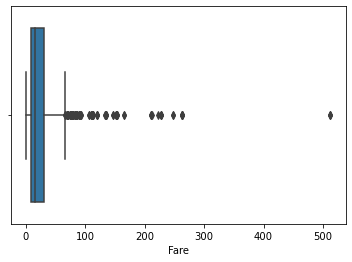

In [17]:
sns.boxplot(titanic["Fare"])

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [18]:
titanic["Fare"] - titanic["Fare"].mean()

0     -24.954208
1      39.079092
2     -24.279208
3      20.895792
4     -24.154208
         ...    
886   -19.204208
887    -2.204208
888    -8.754208
889    -2.204208
890   -24.454208
Name: Fare, Length: 891, dtype: float64

In [19]:
z_score = (titanic["Fare"] - titanic["Fare"].mean() ) / titanic["Fare"].std()

In [20]:
(z_score>3).sum(), (z_score<-3).sum() #sınır değer sayıları

(20, 0)

In [22]:
outlier = ~((z_score>3) | (z_score<-3))
outlier

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Fare, Length: 891, dtype: bool

In [27]:
maximum =titanic.loc[z_score<=3,"Fare"].max()
minimum =titanic.loc[z_score>=-3,"Fare"].min()
print("Sınır değerleri : ",maximum, minimum)

Sınır değerleri :  164.8667 0.0


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [29]:
#python kodu buraya
replace_upper = titanic[z_score<=3]["Fare"].max()
replace_lower = titanic[z_score>=-3]["Fare"].min()

In [30]:
zscore_rep = titanic.copy()
zscore_rep["Fare"][z_score>3] = replace_upper
zscore_rep["Fare"][z_score<-3] = replace_lower

<ipython-input-30-4639b622b552>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscore_rep["Fare"][z_score>3] = replace_upper
<ipython-input-30-4639b622b552>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscore_rep["Fare"][z_score<-3] = replace_lower


In [31]:
zscore_rep["Fare"].min(), zscore_rep["Fare"].max(), zscore_rep.shape

(0.0, 164.8667, (891, 12))

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [33]:
Q1 = titanic.Fare.quantile(q=0.25)
Q3 = titanic.Fare.quantile(q=0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

lower_limit, upper_limit

(-26.724, 65.6344)

In [36]:
(titanic["Fare"]>upper_limit).sum() + (titanic["Fare"]<lower_limit).sum()

116

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [37]:
IQR_replaced = titanic.copy()

IQR_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
IQR_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit

<ipython-input-37-d8390a2cbc21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IQR_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
<ipython-input-37-d8390a2cbc21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IQR_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit


In [38]:
IQR_replaced["Fare"].min(), IQR_replaced["Fare"].max(), IQR_replaced.shape

(0.0, 65.6344, (891, 12))

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [39]:
lower = titanic.Fare.quantile(0.01)
upper = titanic.Fare.quantile(0.99)
print(upper, lower)

249.00622000000033 0.0


In [41]:
total_outlier = (titanic.Fare > upper) | (titanic.Fare < lower)
print("Outlier sayısı : ",total_outlier.sum()) 

Outlier sayısı :  9


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [44]:
HardEdges_replaced = titanic.copy()
HardEdges_replaced["Fare"][titanic["Fare"] > upper] = upper
HardEdges_replaced["Fare"][titanic["Fare"] < lower] = lower

<ipython-input-44-57b16b79d8bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HardEdges_replaced["Fare"][titanic["Fare"] > upper] = upper
<ipython-input-44-57b16b79d8bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HardEdges_replaced["Fare"][titanic["Fare"] < lower] = lower


In [45]:
HardEdges_replaced["Fare"].min(), HardEdges_replaced["Fare"].max(), HardEdges_replaced.shape

(0.0, 249.00622000000033, (891, 12))

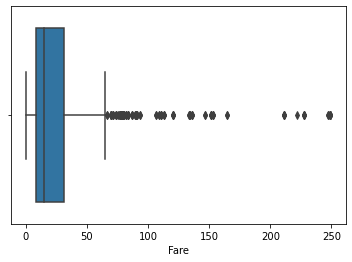

In [46]:
sns.boxplot(HardEdges_replaced.Fare)

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [48]:
"Z-score ile bulunan outlier sayısı: 20, IQR ile bulunan outlier sayısı: 116, Hard Edges ile bulunan outlier sayısı:  9. Bu durumda değiştirilen veri sayısının en az olduğu Hard Edges'in mantıklı olduğunu düşünüyorum"

"Z-score ile bulunan outlier sayısı: 20, IQR ile bulunan outlier sayısı: 116, Hard Edges ile bulunan outlier sayısı:  9 Bu durumda değiştirilen veri sayısının az olduğu Hard Edges'in mantıklı olduğunu düşünüyorum"